In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [94]:
fig = plt.figure()

with open('nancy_finger.txt', 'r') as file1:
    groupIR = []
    for line in file1:
        groupIR.append(float(line))
        '''
        if(line.split('=')[0] == 'RED'):
            groupR.append(float(line.split('=')[1]))
        elif(line.split('=')[0] == 'IR'):
            groupIR.append(float(line.split('=')[1]))
        else:
            groupG.append(float(line.split('=')[1]))'''
            
dataIR = np.transpose(groupIR)
y = signal.resample(dataIR,dataIR.size)
totTime = (dataIR.size*20)/1000
x = np.arange(0,totTime,totTime/dataIR.size)
y-=np.mean(dataIR)
y = -y

<Figure size 432x288 with 0 Axes>

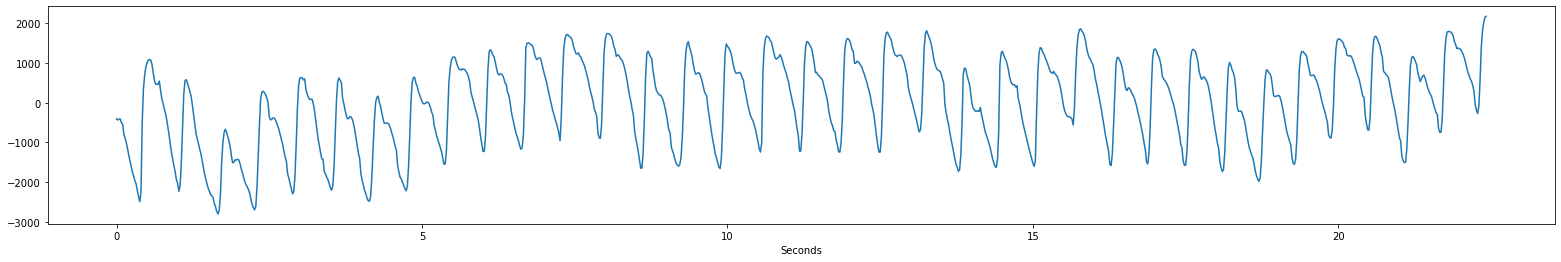

In [96]:
# 50Hz
f = plt.figure()
f.set_size_inches(27,4) 
plt.xlabel("Seconds")
plt.plot(x,y)
#plt.scatter(x, y)

In [ ]:
# look into why the signal is drifting
# invert the signal, take the average and subtract from that